In [1]:
 
import random
import numpy as np
import torch
#test to see if cebmf handles NA
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise
noisy_matrix[1,1]=np.nan
# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.36314834 0.29031834 0.35188005 ... 0.23879085 0.33229677 0.17686343]
 [0.92179798 0.73692986 0.89319508 ... 0.60613501 0.84348585 0.44894149]
 [0.70973007 0.56739253 0.68770753 ... 0.46668821 0.64943435 0.34565846]
 ...
 [0.50424996 0.40312179 0.48860336 ... 0.33157325 0.46141098 0.24558388]
 [0.53008188 0.42377308 0.51363373 ... 0.34855922 0.48504833 0.25816475]
 [0.17923204 0.14328676 0.17367057 ... 0.11785534 0.16400523 0.08729103]]

Noisy Matrix (with Homoscedastic Noise):
[[ 0.39931194  0.22580636  0.38801961 ...  0.27919594  0.52091536
   0.19432122]
 [ 0.94755302         nan  0.70131796 ...  0.6843173   0.71979078
   0.31689582]
 [ 0.76192423  0.597091    0.71275682 ...  0.53808826  0.69675812
   0.33837557]
 ...
 [ 0.61685498  0.39798242  0.31130011 ...  0.38288179  0.53392055
   0.29720171]
 [ 0.46593372  0.46696534  0.59367468 ...  0.36694418  0.66509944
   0.38205939]
 [ 0.20019798  0.09412314  0.25438282 ...  0.05957947 -0.07987649
   0.07

In [2]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ebnm_solver")
sys.path.append(r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine")
from cEBMF import *

In [3]:

noisy_matrix[1,1]=np.nan
imputed_data = IterativeSVD().fit_transform(noisy_matrix)
 

U, s, Vt = np.linalg.svd(imputed_data , full_matrices=False)
 

mycebmf= cEBMF(data= noisy_matrix,
               prior_L = "norm",
               prior_F = "norm")
K=5
K=5

[IterativeSVD] Iter 1: observed MAE=0.076978
[IterativeSVD] Iter 2: observed MAE=0.073457
[IterativeSVD] Iter 3: observed MAE=0.067589
[IterativeSVD] Iter 4: observed MAE=0.056275


c:\Users\willi\anaconda3\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\willi\anaconda3\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\willi\anaconda3\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [4]:
K = np.min([K, U.shape[1]])
print(K)

5


In [5]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])
print(mycebmf.K)

Initializing using Iterative SVD due to missing values.
[IterativeSVD] Iter 1: observed MAE=0.076978
[IterativeSVD] Iter 2: observed MAE=0.073457
[IterativeSVD] Iter 3: observed MAE=0.067589
[IterativeSVD] Iter 4: observed MAE=0.056275
[ 0.23636648 -0.17181757 -0.03261319  0.06391925  0.11688095  0.25962445
 -0.11120985  0.16815913 -0.1043081  -0.20374212 -0.20083493  0.02523321
  0.14038904 -0.00471955  0.16433825  0.02843373  0.06120561  0.00543248
  0.04706994 -0.16133387 -0.28627548  0.01442994 -0.18430503 -0.20766218
  0.015315   -0.01067641 -0.03657196 -0.41753042  0.01491955  0.0057084
  0.09448542  0.09711568  0.20403074  0.24411394  0.16718446  0.30733517
 -0.4281754  -0.2382066  -0.10700459 -0.0717243  -0.28050572 -0.01187837
 -0.21033984 -0.22390364  0.2518014  -0.09489313  0.45098454 -0.10255701
  0.09478146 -0.13484095]
[-0.23741576 -0.11565531  0.2380712   0.18454109  0.22229494  0.04113017
 -0.23709026 -0.12480428 -0.1680115  -0.13891621 -0.15854065 -0.17201644
 -0.17850

c:\Users\willi\anaconda3\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\willi\anaconda3\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\willi\anaconda3\envs\ml_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


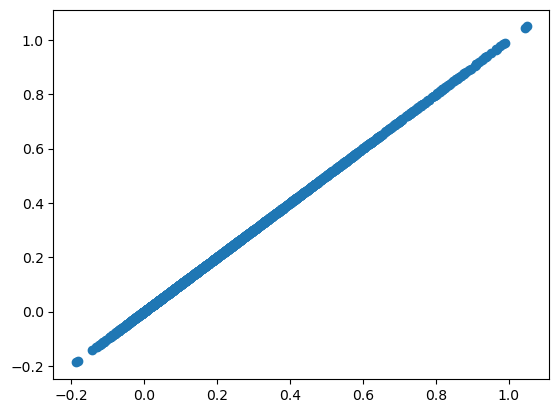

In [6]:
mycebmf.update_fitted_val()
U_k = U[:, :K]
D_k = np.diag(s[:K])
V_k = Vt[:K, :]
L = np.matmul(U_k,  D_k)
F =V_k.T
 
plt.scatter(mycebmf.Y_fit , np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in range(  K)], axis=0) )

check partial residual is good, seems fine

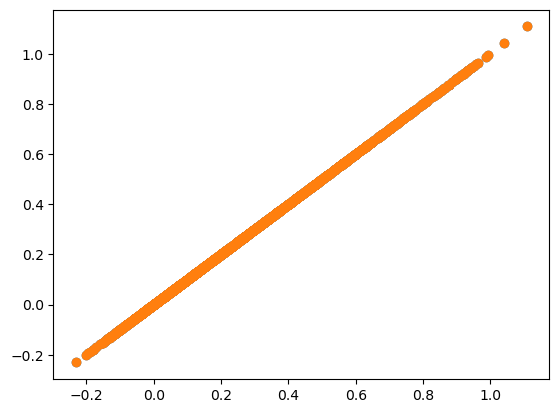

In [7]:
mycebmf.cal_partial_residuals(k=0)
mycebmf.update_fitted_val()
idx_loop = set(range(5))-{0}
Rk= noisy_matrix-np.sum( [np.outer(  mycebmf.L[:, j]  ,  mycebmf.F[:, j]    ) for j in  idx_loop], axis=0)
plt.scatter (mycebmf.Rk, Rk)
plt.scatter( mycebmf.Rk, 
            noisy_matrix- np.sum( [np.outer(    L[:, k]  ,   F[:, k]    ) for k in set(range(  K))-{0}], axis=0)
            )

check if update works

In [8]:
mycebmf.update_tau()
1/mycebmf.tau

array([[0.00659487, 0.00659487, 0.00659487, ..., 0.00659487, 0.00659487,
        0.00659487],
       [0.00659487, 0.00659487, 0.00659487, ..., 0.00659487, 0.00659487,
        0.00659487],
       [0.00659487, 0.00659487, 0.00659487, ..., 0.00659487, 0.00659487,
        0.00659487],
       ...,
       [0.00659487, 0.00659487, 0.00659487, ..., 0.00659487, 0.00659487,
        0.00659487],
       [0.00659487, 0.00659487, 0.00659487, ..., 0.00659487, 0.00659487,
        0.00659487],
       [0.00659487, 0.00659487, 0.00659487, ..., 0.00659487, 0.00659487,
        0.00659487]], dtype=float32)

In [9]:
 
mycebmf.update_loading_factor_k(k=0)

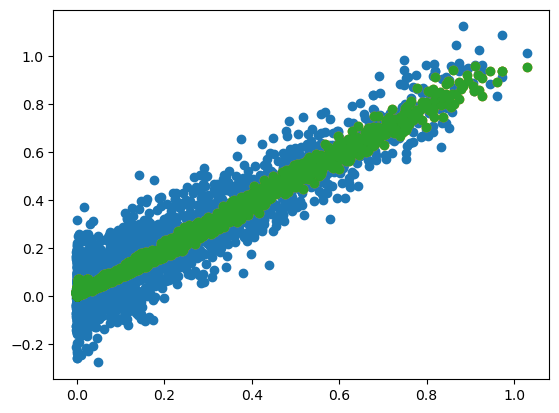

In [10]:
mycebmf.iter()
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)

plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)

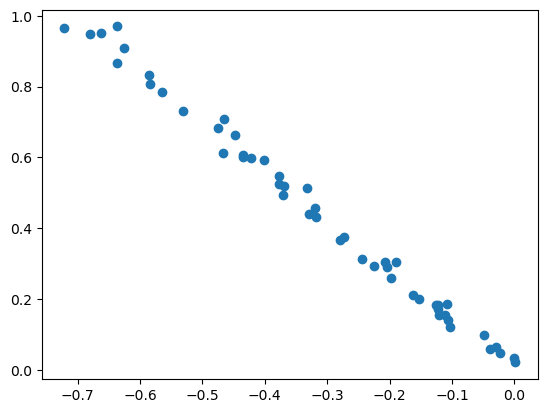

In [11]:
plt.scatter(mycebmf.L[:,0], u)

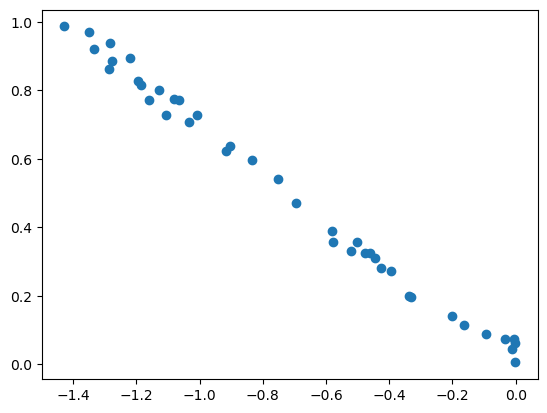

In [12]:
plt.scatter(mycebmf.F[:,0], v)

In [13]:
np.zeros_like(range(10))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
mycebmf.kl_l

array([  28,  -99,  -98, -100,  -99])

In [15]:
k=1

mycebmf.cal_partial_residuals(k=k)
lhat , s_l  = compute_hat_l_and_s_l(Z =mycebmf.Rk,
                                                            nu =mycebmf.F[:,k] ,
                                                            omega=mycebmf.F2[:,k], 
                                                            tau=mycebmf.tau,
                                                            has_nan=mycebmf.has_nan)
     
ash_obj = ash(betahat   =lhat,
                      sebetahat =s_l ,
                      prior     ="norm",
                      verbose=False
                      )
mycebmf.L  [:,k] =ash_obj.post_mean
mycebmf.L2 [:,k] =ash_obj.post_mean2
        
mycebmf.kl_f[k]=  normal_means_loglik(lhat , 
                                           s_l,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )
        
fhat , s_f  = compute_hat_f_and_s_f(Z =mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau  ,
                                                            has_nan=mycebmf.has_nan)
ash_obj = ash(betahat   = fhat, 
                      sebetahat = s_f ,
                      prior     = "norm",
                      verbose=False
                      )
mycebmf.F  [:,k] =ash_obj.post_mean
mycebmf.F2 [:,k] =ash_obj.post_mean2
mycebmf.kl_f[k]=  normal_means_loglik(fhat , 
                                           s_f,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )

In [16]:
mycebmf.prior_L

<function cEBMF.prior_norm(X, betahat, sebetahat, model_param)>

In [17]:
normal_means_loglik(fhat , 
                                           s_f,
                                           ash_obj.post_mean,
                                           ash_obj.post_mean2
                                           )

-309.96801374506856

In [18]:
mycebmf.tau

array([[106.106346, 106.106346, 106.106346, ..., 106.106346, 106.106346,
        106.106346],
       [106.106346, 106.106346, 106.106346, ..., 106.106346, 106.106346,
        106.106346],
       [106.106346, 106.106346, 106.106346, ..., 106.106346, 106.106346,
        106.106346],
       ...,
       [106.106346, 106.106346, 106.106346, ..., 106.106346, 106.106346,
        106.106346],
       [106.106346, 106.106346, 106.106346, ..., 106.106346, 106.106346,
        106.106346],
       [106.106346, 106.106346, 106.106346, ..., 106.106346, 106.106346,
        106.106346]], dtype=float32)

In [19]:
mycebmf.iter()

print(mycebmf.kl_l)
print(mycebmf.kl_f  )


[  28  -82  -95 -102  -98]
[ 54 299 309 315 312]


In [20]:
print( -0.5*np.sum (mycebmf.n_nonmissing* (np.log( 2*np.pi ) - np.log(mycebmf.tau[0,0] + 1e-32)+ 1 )))
print(mycebmf.kl_l  )
print(mycebmf.kl_f  )
print(mycebmf.tau[0,0] )
print( np.sum(mycebmf.kl_l+mycebmf.kl_f)-0.5*np.sum (mycebmf.n_nonmissing* np.log( 2*np.pi ) - np.log(mycebmf.tau[0,0] + 1e-32)+ 1 ))
print(mycebmf.obj)

1824.5987439314474
[  28  -82  -95 -102  -98]
[ 54 299 309 315 312]
105.994644
-895.1264335930953
[inf, 2798.651507848348, 2764.598744025745]


In [21]:
mycebmf.iter()
print(mycebmf.obj)

[inf, 2798.651507848348, 2764.598744025745, 2775.585218637553]


In [22]:
for i in range(80):
    mycebmf.iter()



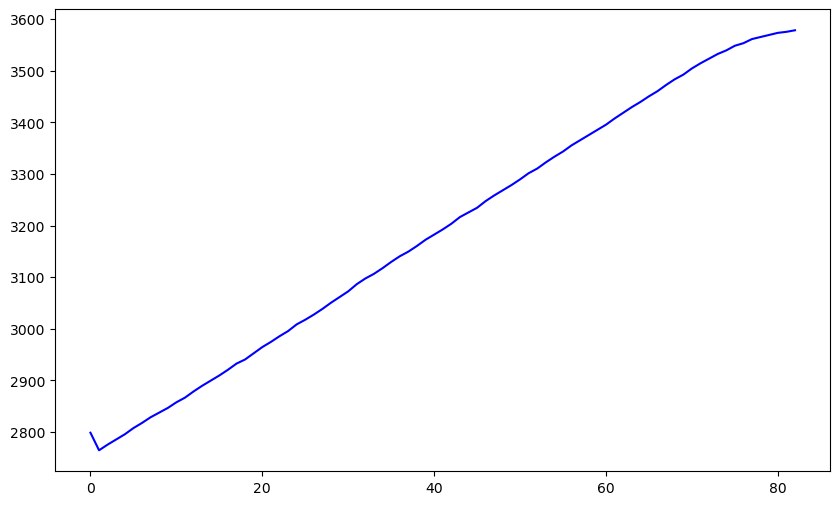

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:],  linestyle='-', color='b')

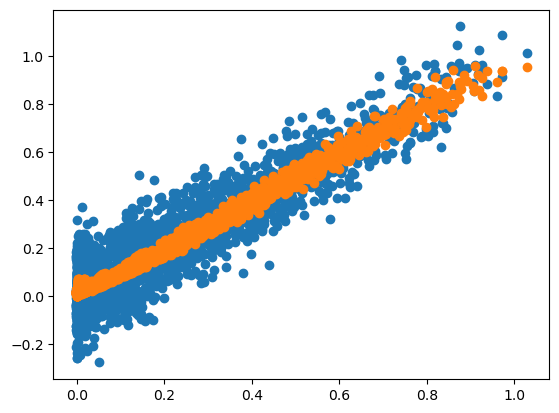

In [24]:
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)


In [25]:
lol=rank_1_matrix + noise

np.sqrt(np.mean(lol - rank_1_matrix)**2)

0.004382550708858376

In [26]:
np.sqrt(np.nanmean(noisy_matrix  - rank_1_matrix)**2)

0.004388467238265819